In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import data_utils as data_utils

dataset = data_utils.get_dataset()

## Encoding dataset
All features in the dataset are categorical. Some of them have too many classes to be one hot encoded. Mean encoding transformation will be perform on the dataset to encode features.

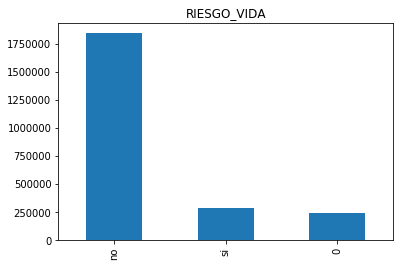

In [16]:
macromotivo = dataset['RIESGO_VIDA'].value_counts()
macromotivo.plot(kind='bar', title='RIESGO_VIDA');

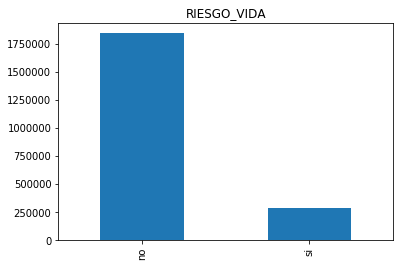

In [19]:
dataset = dataset[dataset['RIESGO_VIDA'] != '0']
macromotivo = dataset['RIESGO_VIDA'].value_counts()
macromotivo.plot(kind='bar', title='RIESGO_VIDA');

In [20]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for column in dataset.columns:
    le.fit(dataset[column])
    dataset[column] = le.transform(dataset[column]) 

dataset.head()

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,7,2,1,2,5,125,12,4,5,2,...,124,1,2,0,2,0,3,3,0,0
1,24,1,1,1,5,817,12,4,5,2,...,813,2,4,0,2,0,0,3,0,0
2,34,2,5,1,5,166,1,4,1,2,...,165,2,4,0,2,0,0,3,0,0
3,20,2,8,1,5,707,13,4,1,2,...,702,2,3,0,2,0,0,3,0,0
4,28,2,1,1,5,333,13,5,1,2,...,331,2,3,0,4,0,0,3,1,0


## Store processed dataset

In [21]:
dataset.to_csv("datasets/naive_dataset.csv", index = False)

## Post Processing Exploration

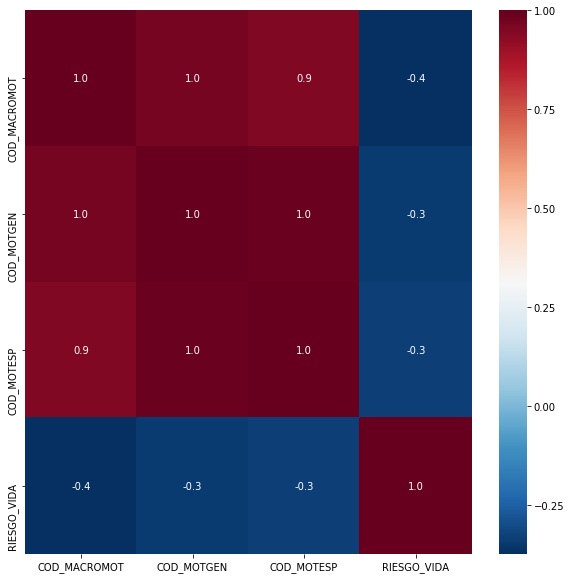

In [22]:
import seaborn as sns
plt.figure(figsize=(10, 10))

ax = sns.heatmap(dataset[['COD_MACROMOT', 'COD_MOTGEN', 'COD_MOTESP', 'RIESGO_VIDA']].corr(), cmap = "RdBu_r", annot=True, fmt='.1f')